In [1]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

import tensorflow as tf

In [84]:
img = Image.open('images/Screen Shot 2019-07-20 at 11.32.49 AM.png').convert('LA')

array = np.array(img)[:,:,0]

array.shape

(604, 604)

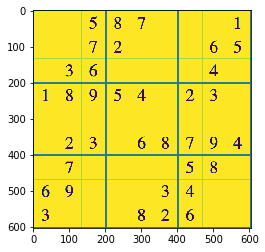

In [85]:
plt.imshow(array);

In [86]:
array = 255-array

divisor = array.shape[0]//9

puzzle = []
for i in range(9):
    row = []
    for j in range(9):
        #slice image, reshape it to 28x28 (mnist reader size)
        row.append(cv2.resize(array[i*divisor:(i+1)*divisor,
                                    j*divisor:(j+1)*divisor][3:-3, 3:-3], 
                              dsize=(28,28), 
                              interpolation=cv2.INTER_CUBIC))
    puzzle.append(row)

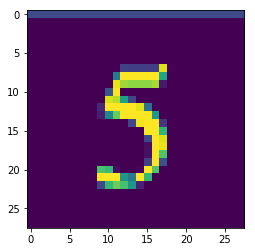

In [87]:
plt.imshow(puzzle[0][2])

In [88]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [89]:
test_images.shape

(10000, 28, 28)

In [90]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32')/255

series = pd.Series(train_labels)
dummies = pd.get_dummies(series)

In [91]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(254, kernel_size=(3,3), input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(140, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
# model.fit(train_images,
#           dummies, 
#           epochs=5,
#           validation_data = [test_images.reshape(10000,28,28,1).astype('float32')/255,
#                              pd.get_dummies(pd.Series(test_labels))])


In [ ]:
# model.predict_classes(puzzle[0][2].reshape(1,28,28,1).astype('float32')/255)

In [73]:
# model.save('image_to_number_model.hdf5')

In [93]:
model.load_weights('image_to_number_model.hdf5')

In [95]:
np.mean(puzzle[0][8])

13.454081632653061

In [96]:
np.mean(puzzle[0][1])

2.107142857142857

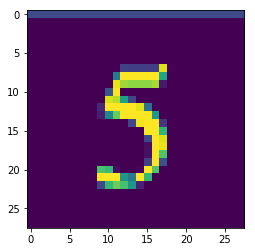

[5]


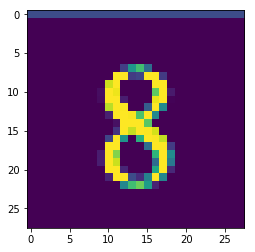

[8]


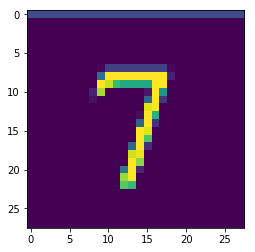

[7]


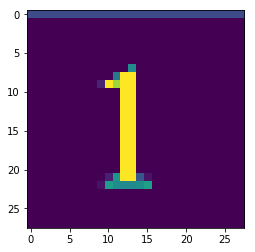

[1]


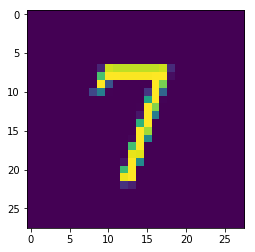

[7]


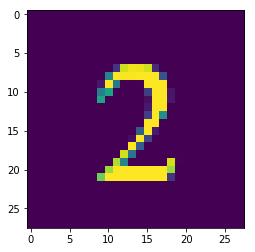

[2]


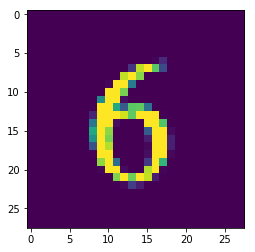

[6]


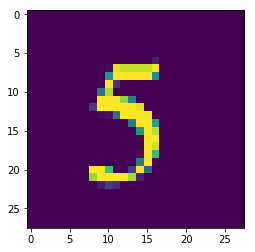

[5]


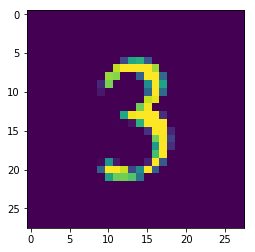

[3]


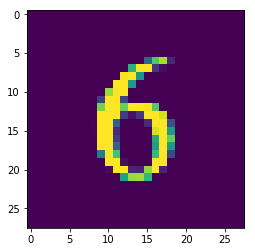

[6]


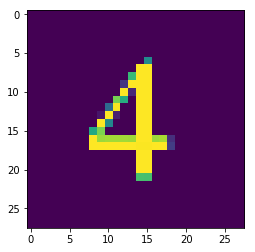

[4]


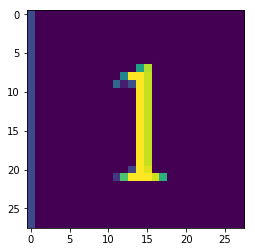

[1]


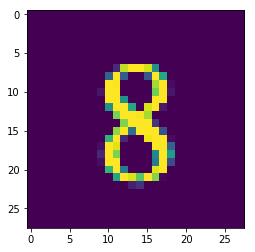

[8]


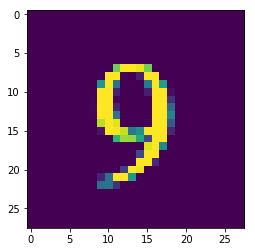

[9]


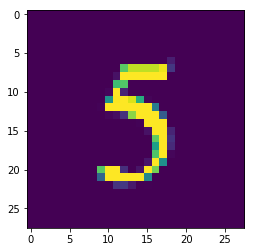

[5]


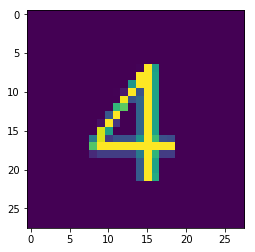

[4]


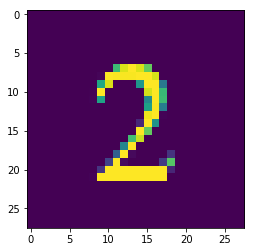

[2]


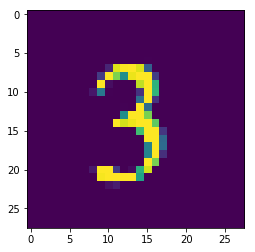

[3]


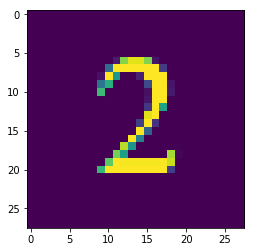

[2]


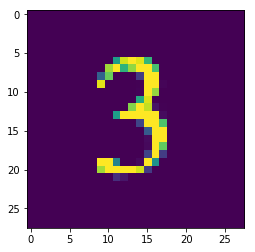

[3]


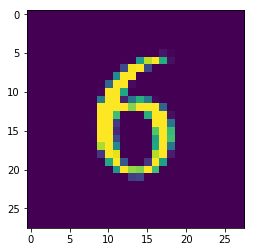

[6]


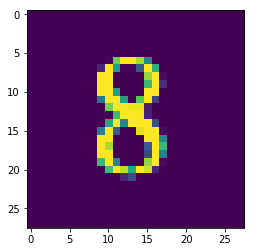

[8]


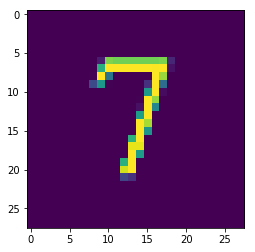

[7]


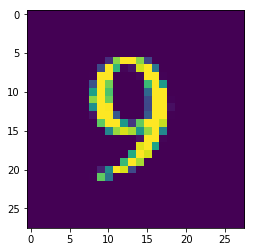

[9]


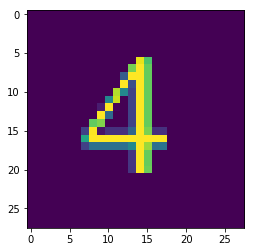

[4]


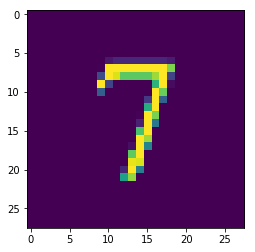

[7]


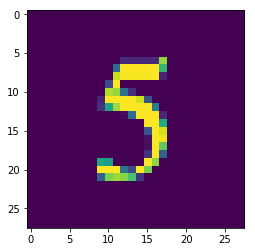

[5]


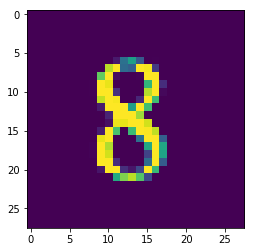

[8]


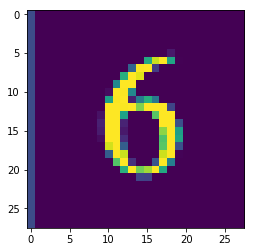

[6]


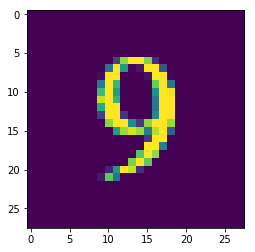

[9]


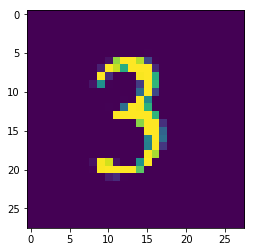

[3]


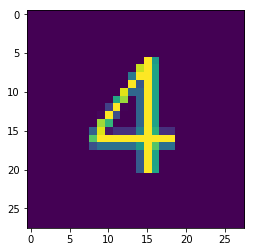

[4]


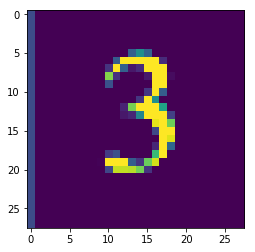

[3]


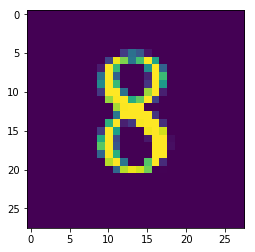

[8]


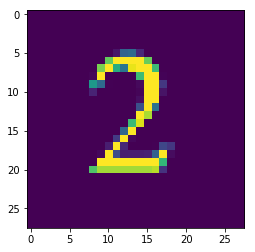

[2]


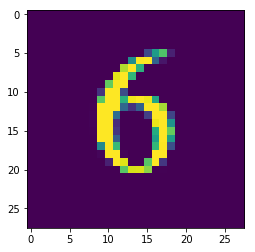

[6]
36


In [97]:
count = 0 
for row in puzzle:
    for spot in row:
        if np.mean(spot) > 6:
            count += 1
            plt.imshow(spot)
            plt.show()
            print(model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255))
            
print(count)

In [99]:
template = [
    [0 for _ in range(9)] for _ in range(9)
]

In [101]:
template

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [102]:
for i, row in enumerate(puzzle):
    for j, spot in enumerate(row):
        if np.mean(spot) > 6:
            template[i][j] = model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255)[0]

In [103]:
template

[[0, 0, 5, 8, 7, 0, 0, 0, 1],
 [0, 0, 7, 2, 0, 0, 0, 6, 5],
 [0, 3, 6, 0, 0, 0, 0, 4, 0],
 [1, 8, 9, 5, 4, 0, 2, 3, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 3, 0, 6, 8, 7, 9, 4],
 [0, 7, 0, 0, 0, 0, 5, 8, 0],
 [6, 9, 0, 0, 0, 3, 4, 0, 0],
 [3, 0, 0, 0, 8, 2, 6, 0, 0]]